# Facial Detection Project

Data from the Kaggle project:

https://www.kaggle.com/karanjakhar/facial-keypoint-detection

In [1]:
# Importing the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics

In [2]:
# Importing the data sets for exploration

training = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
lookTable = pd.read_csv('IdLookupTable.csv')
sampleSub = pd.read_csv('SampleSubmission.csv')

## Data Exploration of the Kaggle Data Set

In [33]:
# Peaking at the training data
training.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  
2  144 142 159 180 188 188 184 180 167 132 84 59 ...  
3  193 192 193 194 194 194 193 192 168 111 50 12 ...  
4  147 148 160 196 215 214 216 217 219 220 206 18...  

[5 rows x 31 columns]

In [47]:
# Checking the size of the data set and the columns it contains
print(training.shape)
print(training.columns)
print(training.isnull().values.any())
print(training.isnull().sum())

(7049, 31)
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')
True
left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x  

In [40]:
# Checking the type of a random point on the table outside of image
rand_point = training.iloc[52,4]
print(type(rand_point))

<class 'numpy.float64'>


In [41]:
# Exploring the contents of the image column
img_test = training.iloc[0,30]
print(type(img_test))
img_test = img_test.split(" ")  # Spliting the string into a list for each number
img_test = list(map(int, img_test))   # Data is in string format so changed to int
img_np = np.array(img_test).reshape(96,96)  # Data is a 1-D array of 9216 pixels
print(img_np)

<class 'str'>
[[238 236 237 ... 250 250 250]
 [235 238 236 ... 249 250 251]
 [237 236 237 ... 251 251 250]
 ...
 [186 183 181 ...  52  57  60]
 [189 188 207 ...  61  69  78]
 [191 184 184 ...  70  75  90]]


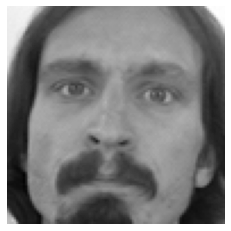

In [48]:
# Checking what selected image displays
plt.imshow(img_np, cmap="gray", aspect='equal')
plt.xticks=[]
plt.yticks=[]
plt.axis('off')
plt.show()

### Dataset 'training'
This dataset contains all of the training examples needed to beginning training the machine learning model. It is split by labels of either the x or y coordinate of a specific face part. It also contains a column that has the image that corresponds with the coordinates in the other columns. Each row is a new image with its respective coordinates.

The coordinates values are floats and represent the pixel location on included image in either the x or y orientation. The image is included in the dataset as a string of all of the pixel values. After converting the string into a list and then array of ints, each image contains an array of 9216 pixels. This comes out to be a image of 96 by 96 pixels.

**Dataset contains 7049 rows and 30 features/labels.**

**Not all of the images have coordinates for all of the possible labels in the dataset.**

In [79]:
# Peaking at IdLookupTable
lookTable.head()

RowId  ImageId              FeatureName
0      1        1        left_eye_center_x
1      2        1        left_eye_center_y
2      3        1       right_eye_center_x
3      4        1       right_eye_center_y
4      5        1  left_eye_inner_corner_x

In [ ]:
# Removes column 'Location' since it contains no information
del lookTable['Location']

In [71]:
# Exploring content of lookTable
print("Shape of lookTable:", lookTable.shape)
print("")
print(lookTable["FeatureName"].value_counts())
print("")
print('Number of Image IDs in lookTable:', lookTable['ImageId'].nunique())
print("")
print(lookTable.isnull().sum())

Shape of lookTable: (27124, 3)

nose_tip_x                   1783
nose_tip_y                   1783
right_eye_center_x           1782
right_eye_center_y           1782
left_eye_center_x            1782
left_eye_center_y            1782
mouth_center_bottom_lip_y    1778
mouth_center_bottom_lip_x    1778
mouth_center_top_lip_y        590
mouth_left_corner_x           590
mouth_left_corner_y           590
mouth_center_top_lip_x        590
left_eye_outer_corner_x       589
left_eye_outer_corner_y       589
right_eye_inner_corner_y      589
right_eye_inner_corner_x      589
right_eye_outer_corner_x      588
left_eye_inner_corner_y       588
right_eye_outer_corner_y      588
left_eye_inner_corner_x       588
mouth_right_corner_y          587
mouth_right_corner_x          587
right_eyebrow_inner_end_x     585
left_eyebrow_inner_end_x      585
right_eyebrow_inner_end_y     585
left_eyebrow_inner_end_y      585
left_eyebrow_outer_end_y      574
left_eyebrow_outer_end_x      574
right_eyebrow_ou

### Dataset 'IdLookTable'
This dataset contains information on features/labels for the facial parts that each image contains. Every image does not have the equal amount of labels. Some are missing label points so therefore the images may not be complete faces.

**Uncertain which images the 'ImageId' refer to. Can possiblity the row in the training set.**

In [21]:
# Peaking at SampleSubmission
sampleSub.head()

RowId  Location
0      1         0
1      2         0
2      3         0
3      4         0
4      5         0

In [61]:
print(sampleSub.shape)  # Same numbers of rows as LookTable
print(sampleSub.isnull().sum())   # Checking for blank points
print("")
print(sampleSub['Location'].value_counts())

(27124, 2)
RowId       0
Location    0
dtype: int64

0    27124
Name: Location, dtype: int64


### Dataset 'SampleSubmission'
This dataset doesn't seem to provide any information. The 'location' column only consists of the value 0. 

In [22]:
# Peaking at test data
test.head()

ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2        3  177 176 174 170 169 169 168 166 166 166 161 14...
3        4  176 174 174 175 174 174 176 176 175 171 165 15...
4        5  50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...

In [78]:
print(test.shape)
print("")
print(test.isnull().values.any())

(1783, 2)

False


In [75]:
# Exploring the content of the image column in test data
test_img = test['Image'][10]
print("Data type of point in 'Image:'", type(test_img))
print("")
test_img = test_img.split(" ")  # Spliting the string into a list for each number
test_img = list(map(int, test_img))   # Data is in string format so changed to int
test_img_np = np.array(test_img).reshape(96,96)  # Data is a 1-D array of 9216 pixels
print(test_img_np)

Data type of point in 'Image:' <class 'str'>

[[182 182 182 ... 181 182 182]
 [183 182 182 ... 183 182 182]
 [180 181 181 ... 182 181 181]
 ...
 [170 126  77 ... 173 173 172]
 [ 58   4   0 ... 175 173 173]
 [  0   0   3 ...  40  81 141]]


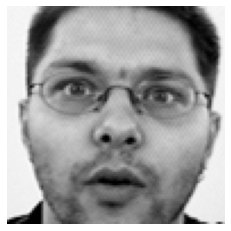

In [76]:
# Checking what selected image displays
plt.imshow(test_img_np, cmap="gray", aspect='equal')
plt.xticks=[]
plt.yticks=[]
plt.axis('off')
plt.show()

### Dataset "Test"
This set contains a column of string based 1-D pixel arrays. Once converted into int values and shaped into a 96 by 96 image, they display faces for testing the model.

**Dataset contains 1783 images.**

### To-do:
+ Make a baseline model with various approaches
+ Determine the approach for the missing labels
    + What causes them to missing labels?
   

## Exploring images with missing data points

To deal the missing data, we are first going to seperate the data into different groups. One containing only complete data points,  one containing 5 more less points missing, one containing 15 or less points, and other greater than 15 points missing.

+ First we need to convert the data in the image column to arrays so that pictures can be displayed afterwords.
+ Medium article link https://medium.com/diving-in-deep/facial-keypoints-detection-with-pytorch-86bac79141e4

In [3]:
# From displaying images with their label points

# From the medium article
IMG_SIZE = 96 # image size 96 x 96 pixels

def show_keypoints(image, keypoints):
    '''
    Show image with keypoints
    Args:
        image (array-like or PIL image): The image data. (M, N)
        keypoints (array-like): The keypoits data. (N, 2)
    '''
      
    plt.imshow(image, cmap='gray')
    if len(keypoints):
        plt.scatter(keypoints[:, 0], keypoints[:, 1], s=24, marker ='.', c='r')
        
def show_images(df, indxs, ncols=10, figsize=(20,15), with_keypoints=True):
    '''
    Show images with keypoints in grids
    Args:
        df (DataFrame): data (M x N)
        idxs (iterators): list, Range, Indexes
        ncols (integer): number of columns (images by rows)
        figsize (float, float): width, height in inches
        with_keypoints (boolean): True if show image with keypoints
    '''
    plt.figure(figsize=figsize)
    nrows = len(indxs) // ncols + 1
    for i, idx in enumerate(indxs):
        image = np.fromstring(df.loc[idx, 'Image'], sep=' ').astype(np.float32)\
                .reshape(-1, IMG_SIZE)
        if with_keypoints:
            keypoints = df.loc[idx].drop('Image').values.astype(np.float32)\
                        .reshape(-1, 2)
        else:
            keypoints = []
        plt.subplot(nrows, ncols, i + 1)
        plt.title(f'Sample #{idx}')
        plt.axis('off')
        plt.tight_layout()
        show_keypoints(image, keypoints)
    plt.show()

+ Next we will begin to the seperate the groups, by counting the amount of na each row contains

In [4]:
# Counting the amount of NA in each row
training['Num_NaN'] = training.isnull().sum(axis=1)
training.tail()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
7044          67.402546          31.842551           29.746749   
7045          66.134400          38.365501           30.478626   
7046          66.690732          36.845221           31.666420   
7047          70.965082          39.853666           30.543285   
7048          66.938311          43.424510           31.096059   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
7044           38.632942                      NaN                      NaN   
7045           39.950198                      NaN                      NaN   
7046           39.685042                      NaN                      NaN   
7047           40.772339                      NaN                      NaN   
7048           39.528604                      NaN                      NaN   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
7044                      NaN                      NaN   
7045                      NaN                      NaN   
7046                      NaN                      NaN   
7047                      NaN                      NaN   
7048                      NaN                      NaN   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  \
7044                       NaN                       NaN  ...   
7045                       NaN                       NaN  ...   
7046                       NaN                       NaN  ...   
7047                       NaN                       NaN  ...   
7048                       NaN                       NaN  ...   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
7044                  NaN                  NaN                   NaN   
7045                  NaN                  NaN                   NaN   
7046                  NaN                  NaN                   NaN   
7047                  NaN                  NaN                   NaN   
7048                  NaN                  NaN                   NaN   

      mouth_right_corner_y  mouth_center_top_lip_x  mouth_center_top_lip_y  \
7044                   NaN                     NaN                     NaN   
7045                   NaN                     NaN                     NaN   
7046                   NaN                     NaN                     NaN   
7047                   NaN                     NaN                     NaN   
7048                   NaN                     NaN                     NaN   

      mouth_center_bottom_lip_x  mouth_center_bottom_lip_y  \
7044                  50.426637                  79.683921   
7045                  50.287397                  77.983023   
7046                  49.462572                  78.117120   
7047                  50.065186                  79.586447   
7048                  45.900480                  82.773096   

                                                  Image  Num_NaN  
7044  71 74 85 105 116 128 139 150 170 187 201 209 2...       22  
7045  60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...       22  
7046  74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...       22  
7047  254 254 254 254 254 238 193 145 121 118 119 10...       22  
7048  53 62 67 76 86 91 97 105 105 106 107 108 112 1...       22  

[5 rows x 32 columns]

In [36]:
# Checking the types of NaN counts
training["Num_NaN"].value_counts()

22    4755
0     2140
2       87
4       28
24      10
6        9
8        8
12       5
10       3
14       2
20       2
Name: Num_NaN, dtype: int64

In [5]:
# Dataframe of only completed values, no NaN
training_complete = training[training["Num_NaN"] == 0]
training_complete.isnull().values.any()
training_complete = training_complete.drop("Num_NaN", axis=1)

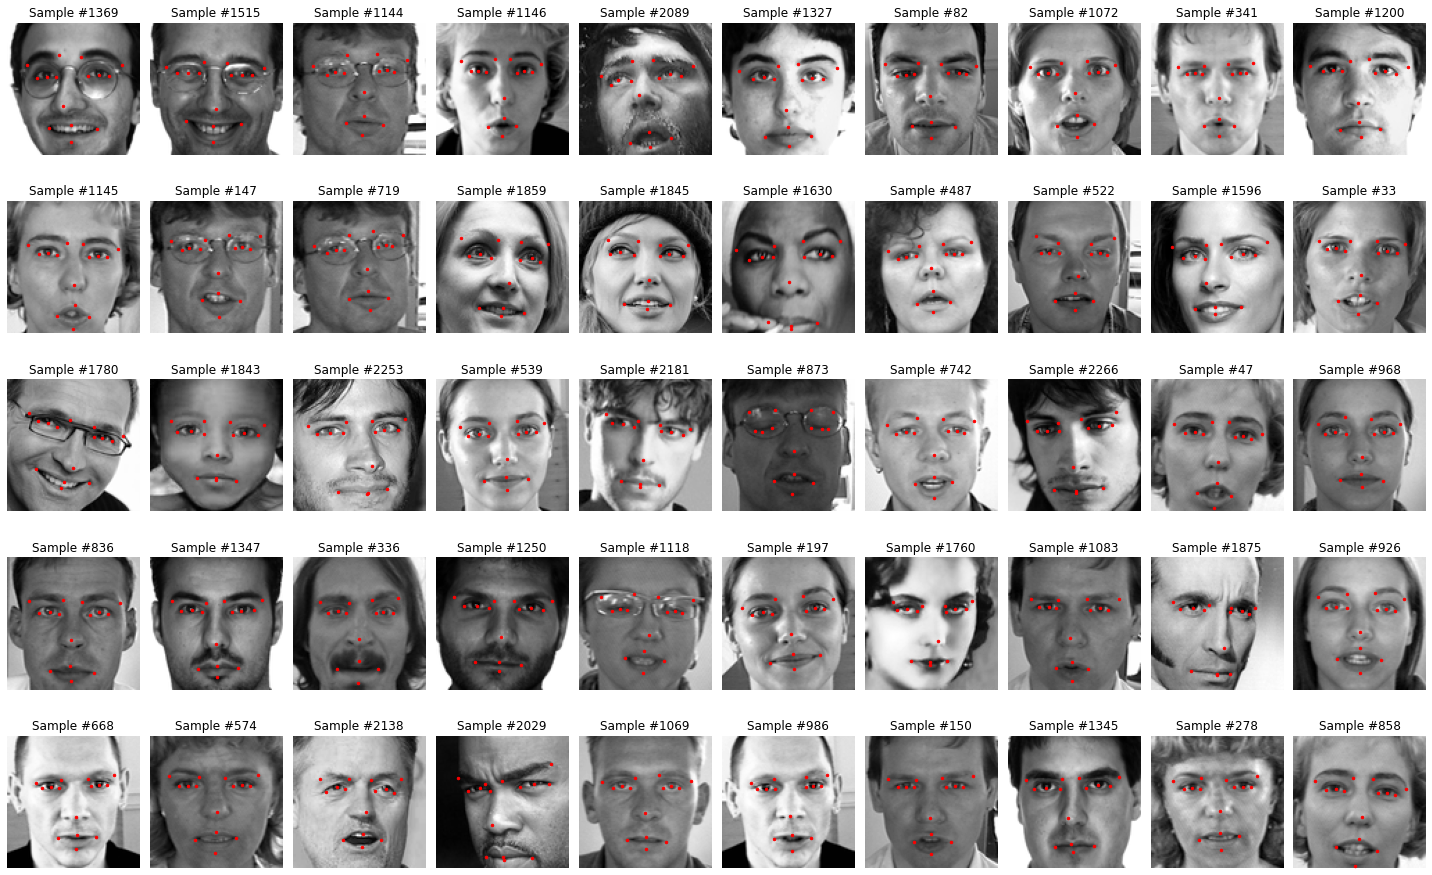

In [6]:
# Displaying images with no NaN, complete labels
rand_img = np.random.choice(training_complete.index, 50, replace=False)
show_images(training_complete, rand_img)

### Comments on complete labels set
+ Pictures are clear
+ Subjects faces are mostly facing the camera
+ All tracked points are visible in the image
+ Points are accurate

In [88]:
# Selecting data with 5 or less NaN values, except 0
training_5 = training[(training["Num_NaN"] != 0) & (training["Num_NaN"] < 6)]
training_5["Num_NaN"].value_counts()

2    87
4    28
Name: Num_NaN, dtype: int64

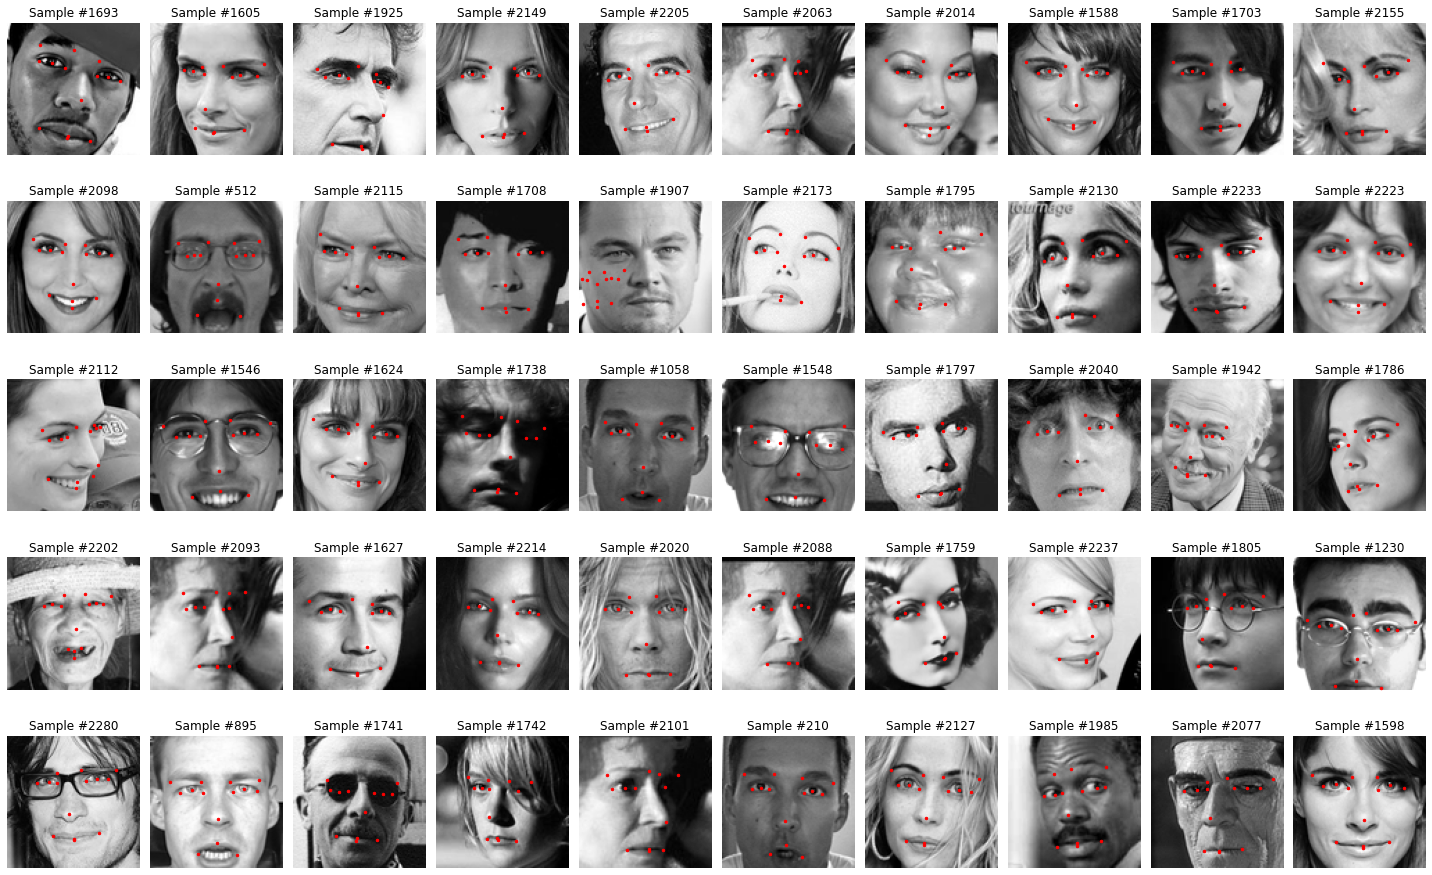

In [89]:
training_5 = training_5.drop("Num_NaN", axis=1)
rand_img = np.random.choice(training_5.index, 50, replace=False)
show_images(training_5, rand_img)    # `training_5` contains 115 pictures

### Comments on 5 or less NaN set
+ Images similar to complete label set
+ Sample #1907 label points seems to complete miss the image
+ Some tracking points are not clearly visible
+ Some image faces are rotated to the side

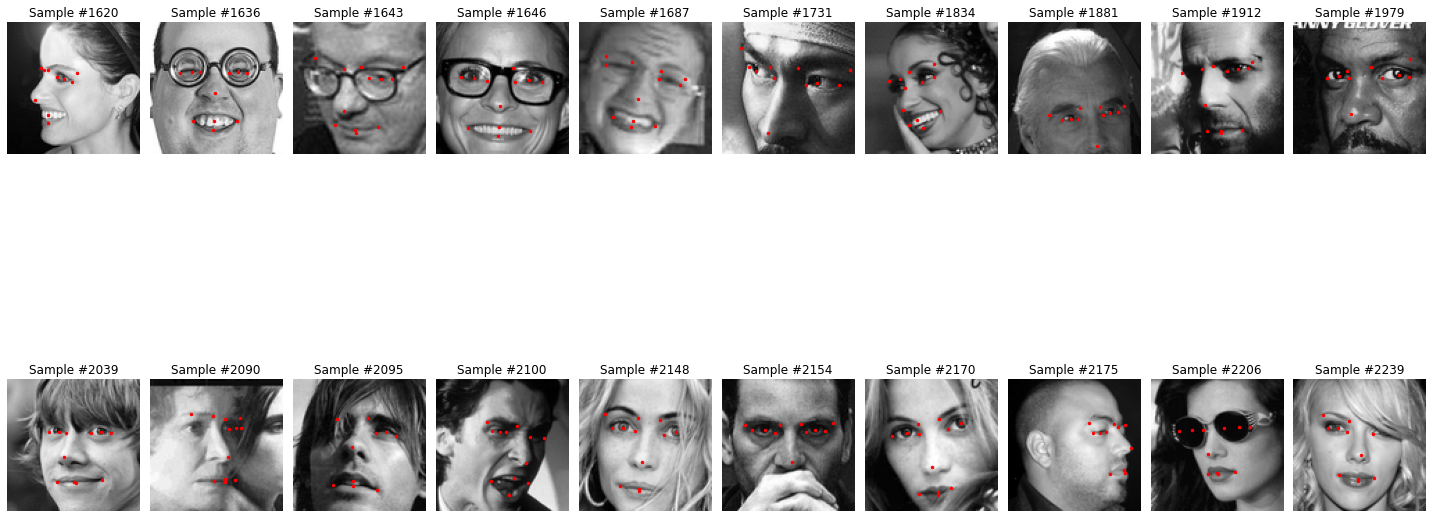

In [90]:
# Data with more than 5 and less than 10 NaN
training_10 = training[(training["Num_NaN"] > 5) & (training["Num_NaN"] < 11)]
training_10 = training_10.drop("Num_NaN", axis=1)
show_images(training_10, training_10.index)    # `training_10` contains only 20 pictures

### Comments on 10 or less NaN set
+ Some images are cut so the complete face is not shown
+ Images are faces rotated so they are not completely facing the camera
+ Some tracking points are covered and can not be seen

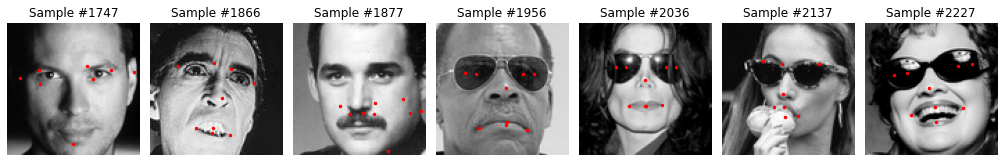

In [64]:
# Data with more than 10 and less than 15 NaN
training_15 = training[(training["Num_NaN"] > 10) & (training["Num_NaN"] < 16)]
training_15 = training_15.drop("Num_NaN", axis=1)
show_images(training_15, training_15.index)    # `training_15` contains only 7 pictures

### Comments on 15 or less NaN set
+ Subjects are wearing sunglasses

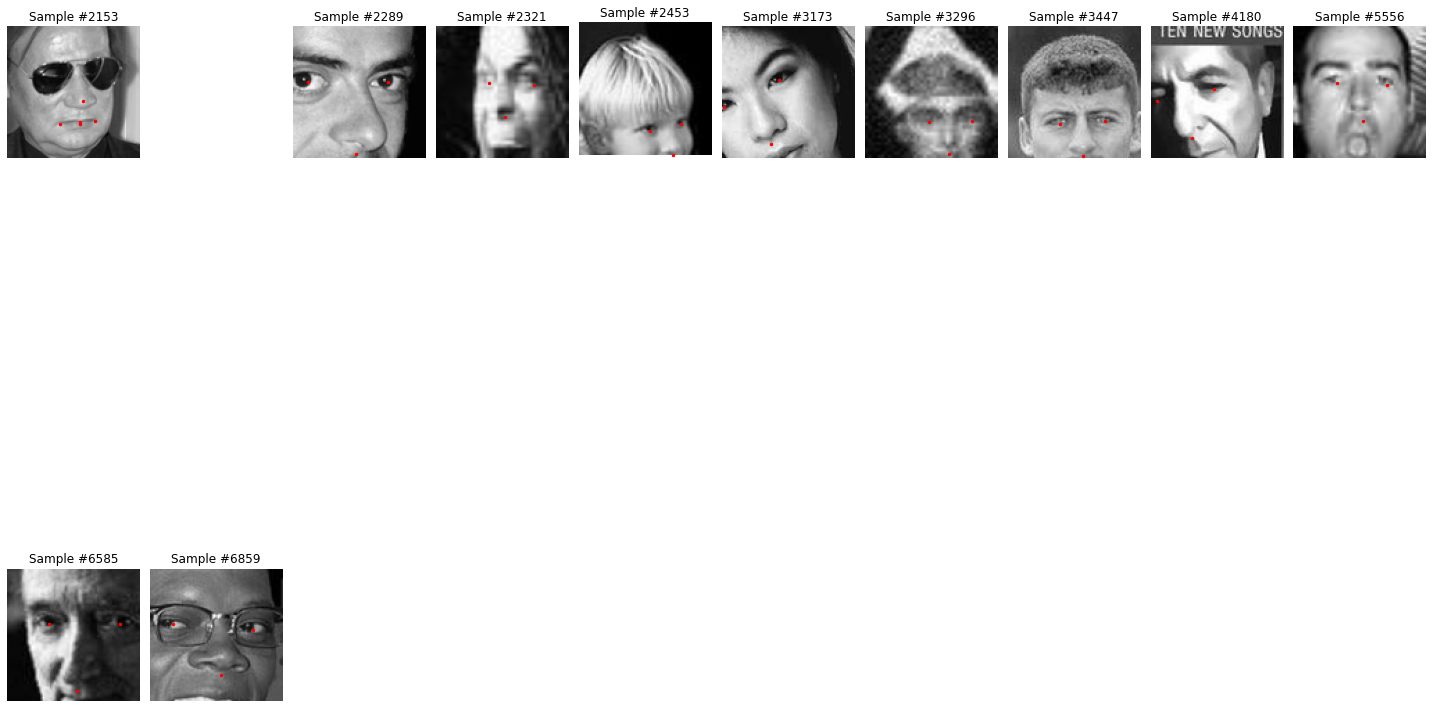

In [71]:
# Data with more than 15 NaN excluding 22 NaN value due to that one having the most examples
training_most_nan = training[(training["Num_NaN"] > 15) & (training["Num_NaN"] != 22)]
training_most_nan = training_most_nan.drop("Num_NaN", axis=1)
show_images(training_most_nan, training_most_nan.index)    # `training_most_nan` contains only 12 pictures

### Comments on Most NaN set
+ Images are cropped so the complete faces are not shown
+ Some imagesa are of low quality so it is hard to distinguish features
+ One image doesn't display

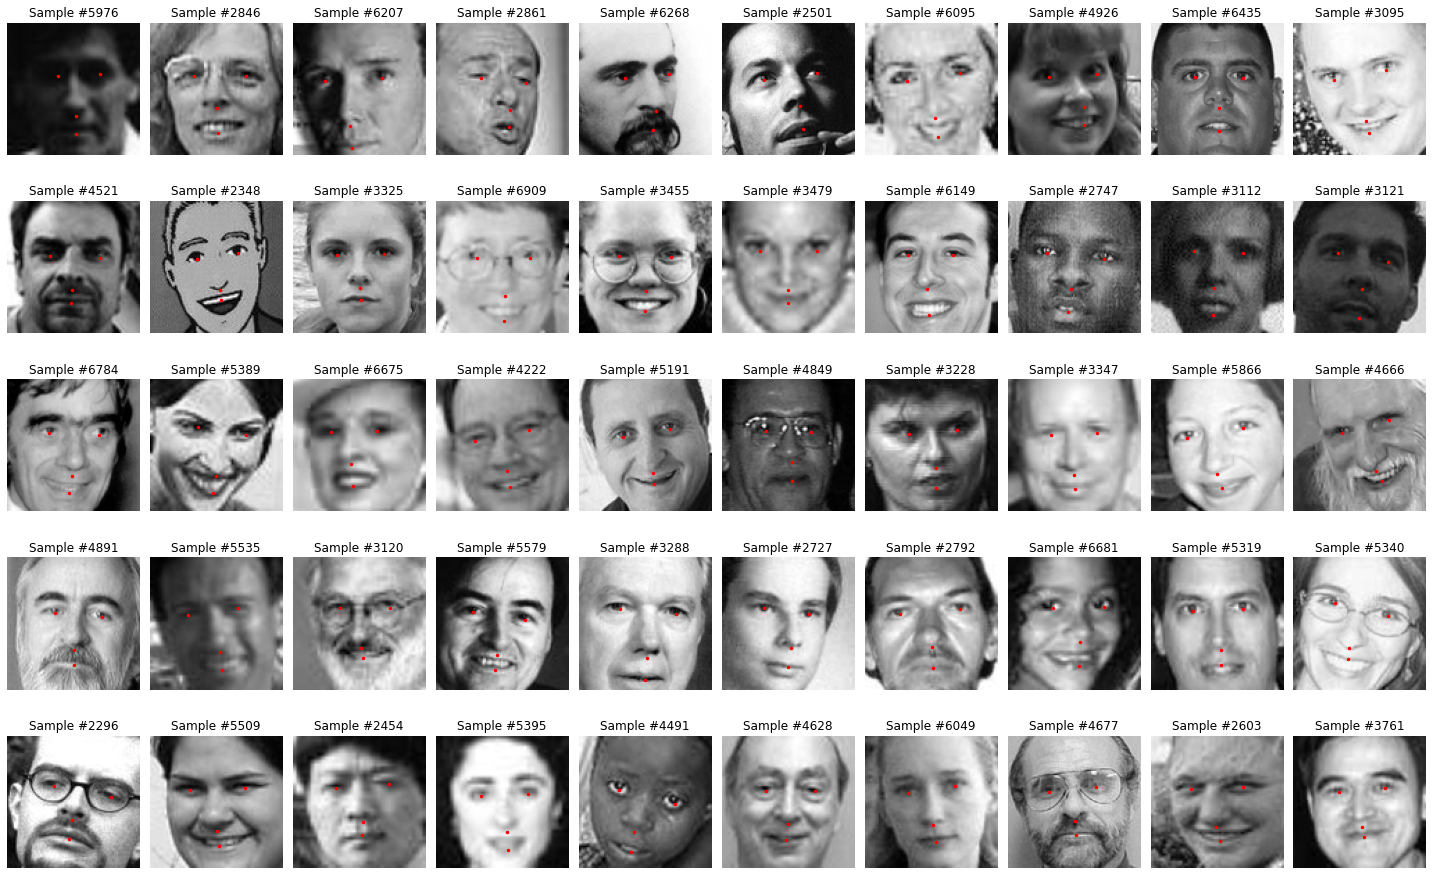

In [16]:
# Data with 22 NaN, contains the most examples
training_22 = training[training["Num_NaN"] == 22]
training_22 = training_22.drop("Num_NaN", axis=1)
rand_img = np.random.choice(training_22.index, 50, replace=False)
show_images(training_22, rand_img)

### Comments on 22 NaN set, largest set
+ Images are of low quality, can not see features clearly


## Data preparing for Machine Learning Model

In [81]:
# Transforming the string based "Image" column to an array
def string_to_img(img_str):
    """Converts a string to an array for image processing"""
    img = img_str.split(" ")
    img = list(map(int, img))
    img_arr = np.array(img)
    
    return img_arr

In [ ]:
# Avaliable data sets:
# training_complete - all labels present
# training_5 - missing 5 or less labels
# training_10 - missing 10 or less labels
# training_15 - missing 15 or less labels
# training_most_nan - missing more than 15 labels excluding 22
# training_22 - missing 22 labels, contains the most examples

In [82]:
# Converting "Image" in `training_complete`
training_complete["Image"] = training_complete["Image"].apply(lambda x: string_to_img(x))
print(type(training_complete.iloc[10,30]))

<class 'numpy.ndarray'>


In [6]:
def process_img(data):
    images = []
    for idx, sample in data.iterrows():
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255.
    return images

def keypoints(data):
    keypoint = data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features

In [7]:
# Using only `training_complete` dataset

np.random.seed(100)
# Making the data random
training_complete = training_complete.sample(frac=1)
# Making partitions for training and testing
comp_train_data = process_img(training_complete.iloc[:-500,])
comp_train_labels = keypoints(training_complete.iloc[:-500,])
comp_dev_data = process_img(training_complete.iloc[-500: ,])
comp_dev_labels = keypoints(training_complete.iloc[-500: ,])

In [5]:
# Converts all of the points in the column 'Image' to an array
training['Image'] = training["Image"].apply(lambda x: string_to_img(x))
print(type(training.iloc[5,30]))

<class 'numpy.ndarray'>


In [86]:
# Shuffling the rows in the dataset
np.random.seed(100)

training = training.sample(frac=1)

training_data = training.iloc[:6000, 30]
training_labels = training.iloc[:6000, :30]
dev_data = training.iloc[6000: , 30]
dev_labels = training.iloc[6000: , :30]

## Baseline Model

In [8]:
import tensorflow as tf
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Conv2D,MaxPool2D, ZeroPadding2D
from keras.models import Sequential, Model

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

C:\Users\Public\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Public\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Public\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Public\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [12]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [9]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30))

model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae', 'acc'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)      

In [10]:
model.fit(comp_train_data, comp_train_labels, epochs = 40, batch_size = 256, validation_split = 0.2)


Train on 1312 samples, validate on 328 samples
Epoch 1/40
1312/1312 [==============================] - 80s 61ms/step - loss: 1267.3246 - mae: 29.7827 - acc: 0.0968 - val_loss: 2294.7972 - val_mae: 44.4433 - val_acc: 0.0244
Epoch 2/40
1312/1312 [==============================] - 79s 60ms/step - loss: 262.2177 - mae: 12.9154 - acc: 0.2622 - val_loss: 1450.4345 - val_mae: 35.4950 - val_acc: 0.6982
Epoch 3/40
1312/1312 [==============================] - 79s 60ms/step - loss: 175.8030 - mae: 10.5736 - acc: 0.2851 - val_loss: 965.8901 - val_mae: 28.4684 - val_acc: 0.6982
Epoch 4/40
1312/1312 [==============================] - 79s 60ms/step - loss: 149.0468 - mae: 9.7153 - acc: 0.2142 - val_loss: 637.9133 - val_mae: 23.3080 - val_acc: 0.6982
Epoch 5/40
1312/1312 [==============================] - 79s 60ms/step - loss: 123.2725 - mae: 8.8633 - acc: 0.2805 - val_loss: 534.1322 - val_mae: 21.3533 - val_acc: 0.6982
Epoch 6/40
1312/1312 [==============================] - 79s 60ms/step - loss: 108

In [13]:
preds = model.predict(comp_dev_data)